In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
import scipy as sp
import matplotlib.mlab as mlab
import matplotlib.artist as artist
from pathlib import Path
import tkinter as tk
from tkinter import filedialog

In [6]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [7]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if (str(i)[-9:] != 'Sheet.csv') == True]
files = [i for i in files if (str(i)[-3:] == 'csv') == True]
files

[WindowsPath('D:/Sofia/Data_Sheets_methylcellulose/Sofia_2020-03-04.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_methylcellulose/Sofia_2020-03-09.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_methylcellulose/Sofia_2020-03-11.csv')]

In [134]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'

DCXconc = '[DCX] ' r'$(\mu M)$'
DCX = 'DCX'
Type = 'DCX Type'

Concentration = 'Concentration ' r'$(\mu M)$'
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'
ShrinkageLength = 'Shrink Length ' r'$(\mu m)$'
ShrinkageLifetime = 'Shrink Lifetime ' r'$(min)$'
ShrinkageRate = 'Shrink Rate ' r'$(\mu m / min)$'

In [9]:
jointdate = ''

for i in files :
    dateloc = str(i).find("2020")
    date = str(i)[dateloc : dateloc+10]
    jointdate = jointdate+'_'+date
jointdate

'_2020-03-04_2020-03-09_2020-03-11'

In [10]:
data = pd.read_csv(files[0], encoding='utf-8')
for i in range(1,len(files)):
    d = pd.read_csv(files[i], encoding='utf-8')
    data = data.append(d, ignore_index=True)
data.to_csv(path/('MasterSheet.csv'), encoding='utf-8', index=False)

In [12]:
data_mean = data.groupby(['Date', 'CH']).mean()
data_std = data.groupby(['Date', 'CH']).std()
data_mean

[Tubulin] $(\mu M)$  [DCX] $(\mu M)$  Length $(\mu m)$  \
Date       CH                                                           
2020-03-04 12                  7.0              0.0          4.159714   
           13                  6.0              0.0          3.103411   
           23                  7.0            100.0          7.480909   
2020-03-09 11                  6.0            100.0          5.497186   
           14                  6.0            100.0          8.384085   
           21                  6.0              0.0          2.823342   
2020-03-11 12                  5.0            100.0          6.311244   
           13                  5.0            100.0          5.340842   
           21                  5.0              0.0          3.446973   

               Lifetime $(min)$  Growth Rate $(\mu m / min)$  \
Date       CH                                                  
2020-03-04 12          6.180905                     0.659952   
           13          5.384811                     0.597618   
           23         11.002727                     0.698041   
2020-03-09 11         10.011679                     0.562885   
           14         16.921650                     0.508428   
           21          5.296838                     0.546497   
2020-03-11 12         10.543148                     0.594657   
           13          9.198639                     0.576322   
           21          6.176506                     0.551201   

               Time to Nucleate $(min)$  Shrink Length $(\mu m)$  \
Date       CH                                                      
2020-03-04 12                  4.113199                 4.209212   
           13                  4.384152                 3.144470   
           23                  1.406733                 3.527536   
2020-03-09 11                  0.601341                 2.040090   
           14                  1.328900                 2.927625   
           21                 10.811795                 2.884208   
2020-03-11 12                  0.595840                 3.399444   
           13                  0.854447                 2.160589   
           21                  7.055805                 3.534113   

               Shrink Lifetime $(min)$  Shrink Rate $(\mu m / min)$   Rescues  
Date       CH                                                                  
2020-03-04 12                 0.253084                    21.276451  0.037037  
           13                 0.187310                    18.552323  0.000000  
           23                 1.917500                     1.974763  0.969697  
2020-03-09 11                 1.636614                     1.369232  0.988095  
           14                 2.043467                     1.539858  0.967213  
           21                 0.185048                    17.831579  0.048193  
2020-03-11 12                 1.873148                     2.087644  0.964286  
           13                 1.140627                     1.816047  0.975904  
           21                 0.241730                    18.019026  0.063291

In [284]:
blue = '#23459C'
orange = '#FF7300'
green = '#79BA1A'

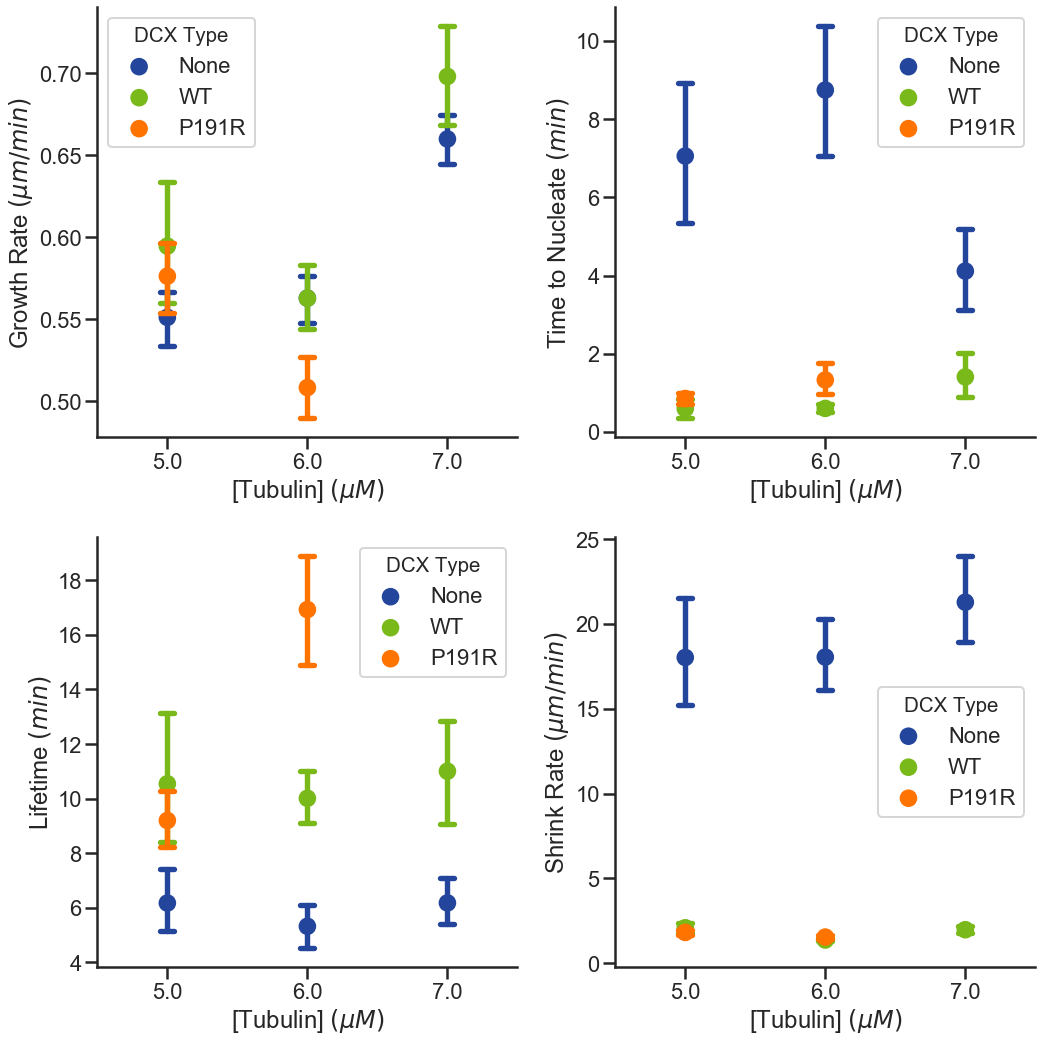

In [287]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
palette = [blue,green,orange]
sns.set_style("ticks")
sns.pointplot(x=tubulin, y=GrowthRate,
                hue=Type,err_style="bars", marker='o', join=False, capsize=.1,
                data=data,err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[0][0])
sns.pointplot(x=tubulin, y=TimeToNucleate,
                hue=Type,err_style="bars", marker='o', join=False, capsize=.1,
                data=data,err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[0][1])
sns.pointplot(x=tubulin, y=Lifetime,
                hue=Type,err_style="bars", marker='o', join=False, capsize=.1,
                data=data,err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[1][0])
sns.pointplot(x=tubulin, y=ShrinkageRate,
                hue=Type,err_style="bars", marker='o', join=False, capsize=.1,
                data=data,err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[1][1])
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
plt.savefig(path/('plots'+jointdate+'.pdf'))
plt.savefig(path/('plots'+jointdate+'.png'))

# Fitting Data #

In [260]:
def make_hist(data, parameter, bins, constant) :
    fig, ax = plt.subplots(figsize=(15,15))
    sns.set_style("ticks")
    hist = data.hist(by=[Type,tubulin], column=parameter, bins = bins,density=True,ax=ax)
    fig.suptitle(parameter)
    
    sns.despine()
    sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    unique = data[DCXconc].unique()
    cte = [x for x in unique if x > 0]
    
    return hist, cte[0],fig

In [170]:
def get_hist(ax):
    n,bins = [],[]
    for rect in ax.patches:
        
            ((x0, y0), (x1, y1)) = rect.get_bbox().get_points()
            n.append(y1-y0)
            bins.append(x0) # left edge of each bin
    
        #bins.append(x1) # also get right edge of last bin

    return n,bins


In [107]:
def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) )/(sig*np.sqrt(2*np.pi))

def exponential(x, scale):
    return ((np.exp(-x/scale) )/(scale))

def gamma(x, shape, scale):
    return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))


In [317]:
def equation_fit(data, parameter, equation, constant,maxbin,binsize):
    
    bins = np.arange(0, maxbin + binsize, binsize)
    hist, cte,fig = make_hist(data, parameter, bins, constant) 
    
    results = pd.DataFrame(columns=[] , index=[])
    
    for i in np.arange(0,len(hist[0][:])):
        for j in np.arange(0,len(hist[:][0])):
        
            n, bins =  get_hist(hist[j][i]);
            
            if n == []:
                break
            
            title = []
            title = hist[j][i].get_title()
            title = title[1:-1]
            title = title.split(',')
            
            if equation == gamma :
                coeff, var_matrix = sp.optimize.curve_fit(equation,bins,n,[2,1])
            else :
                coeff, var_matrix = sp.optimize.curve_fit(equation,bins,n)

            variance = np.diagonal(var_matrix) #Refer [3]
            SE = np.sqrt(variance) #Refer [4]

        #======Making a data frame========
            results0 = pd.DataFrame(columns=[] , index=[])
            for k in np.arange(0,len(coeff)):
                header = [np.array([parameter]),np.array(['Coefficient '+ str(k)])]
                r0 = pd.DataFrame([coeff[k],SE[k]], index=(['Value','SE']),columns= header)
                results0 = pd.concat([results0, r0], axis=1, sort=False)
            
            results0[tubulin] = float(title[1])
            if title[0] == 'None':
                results0[constant] = 0
            else:
                results0[constant] = cte
            results0[Type] = title[0]
            
            results = pd.concat([results, results0], sort=False)

    return results,fig

In [251]:
newmydir = path/('fitdata')
newmydir.mkdir(exist_ok=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:385: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:385: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:385: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:385: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds


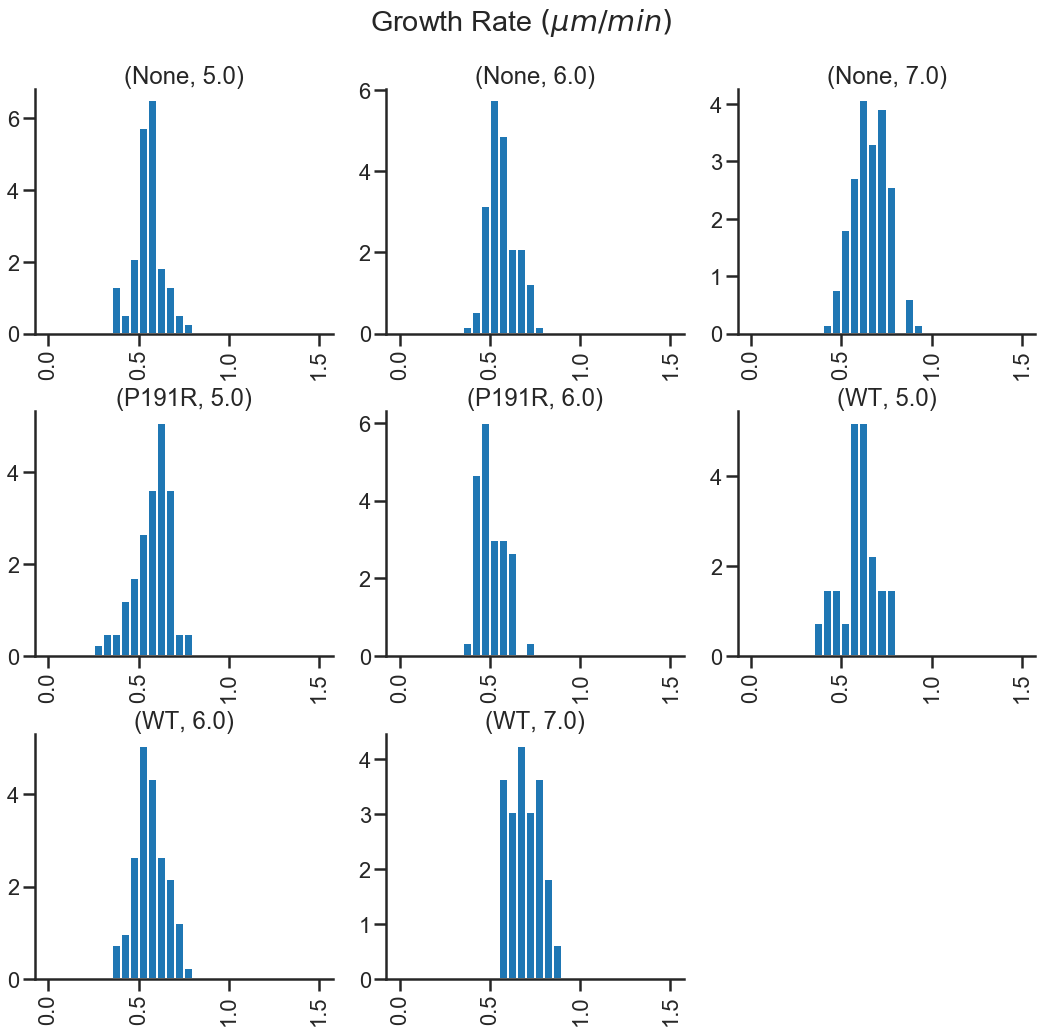

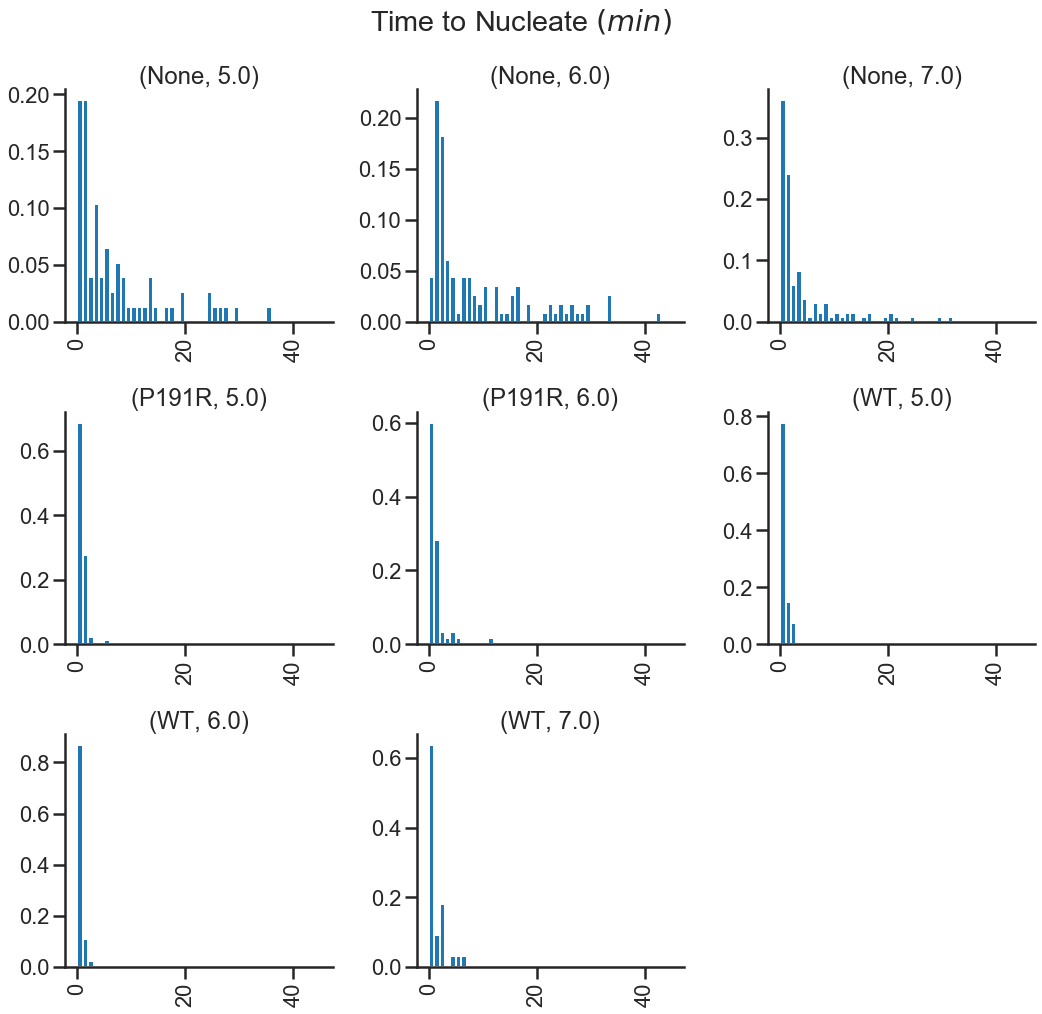

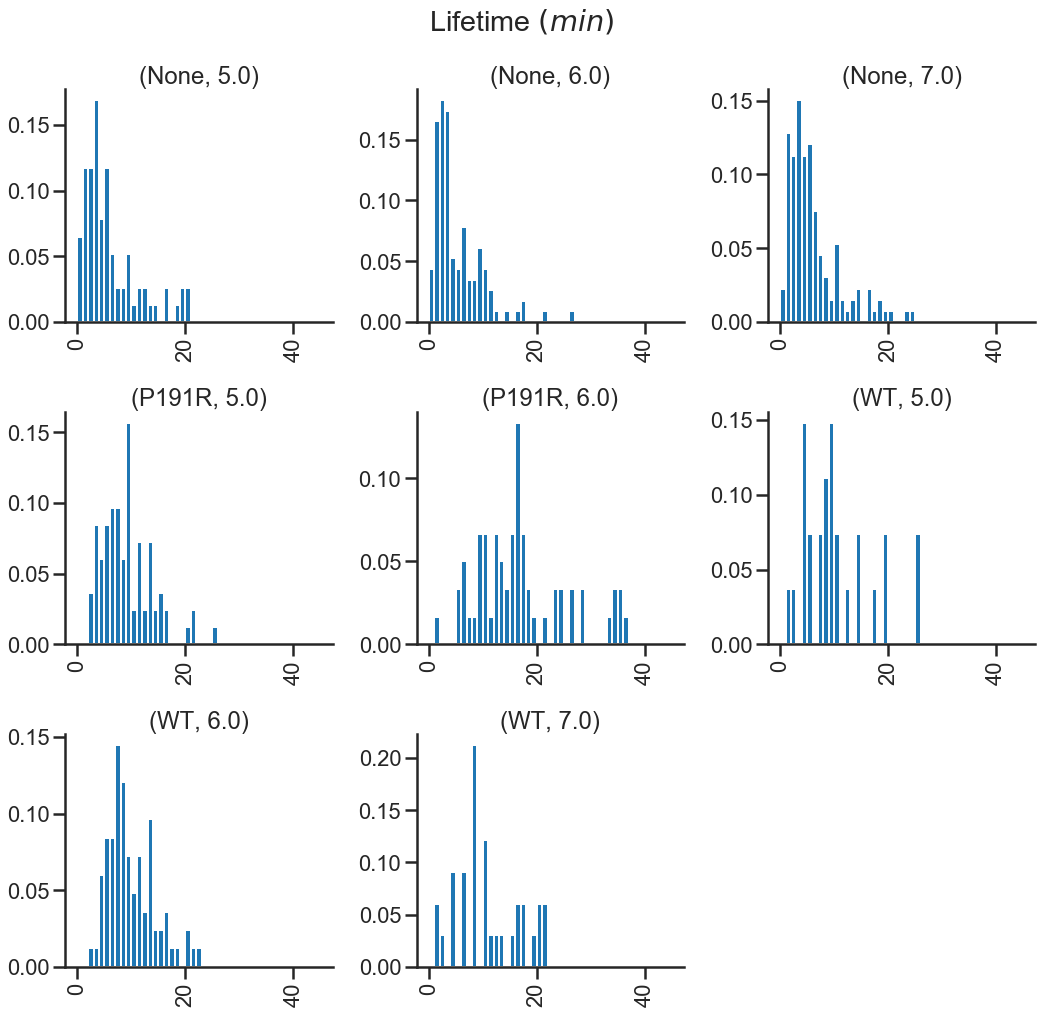

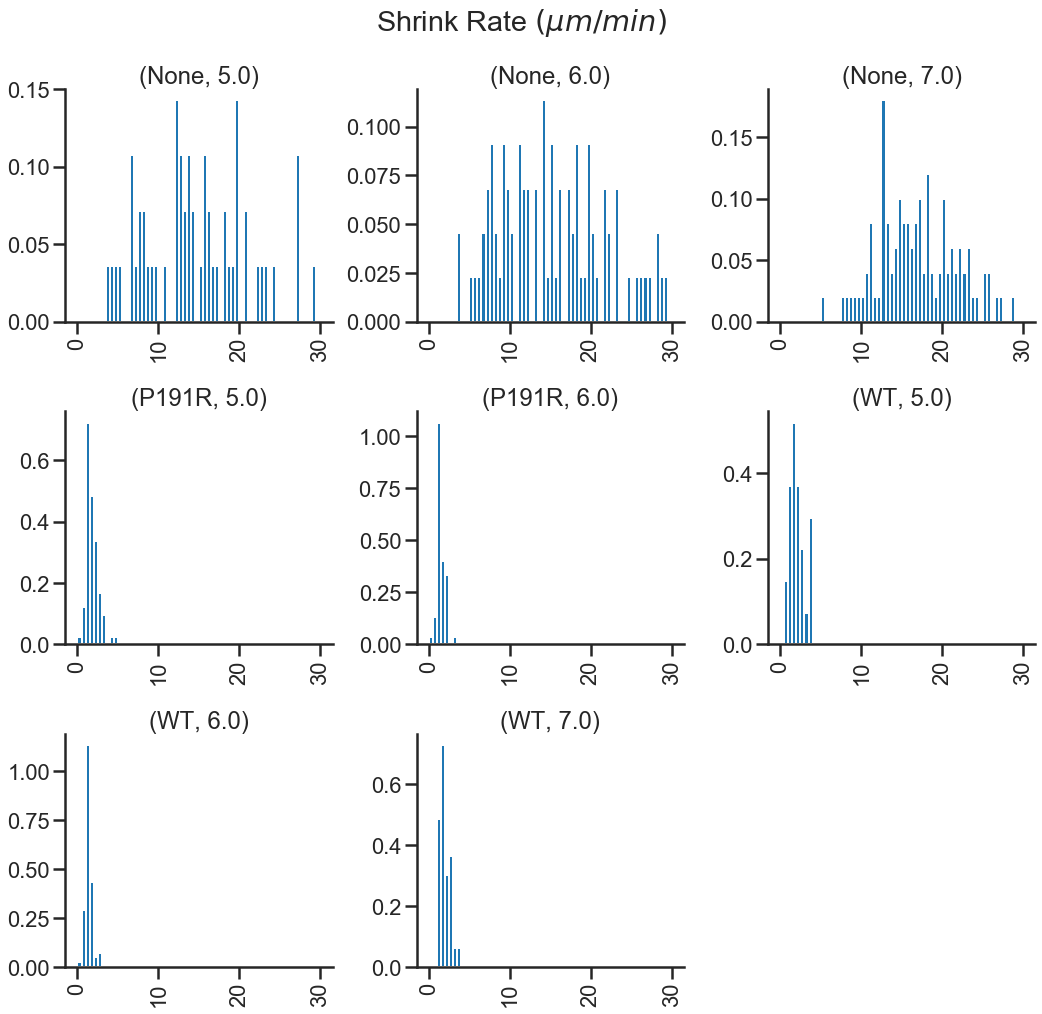

In [322]:
GrowthRateFit , GrowthRateFig = equation_fit(data,GrowthRate,gaussian,DCXconc,1.5,0.05);
GrowthRateFig.savefig(newmydir/('GrowthRateHist_'+jointdate+'.pdf'))

TimeToNucleateFit , TimeToNucleateFig = equation_fit(data,TimeToNucleate,exponential,DCXconc,45,1);
TimeToNucleateFig.savefig(newmydir/('TimeToNucleateHist_'+jointdate+'.pdf'))#

LifetimeFit , LifetimeFig = equation_fit(data,Lifetime,gamma,DCXconc,45,1);
LifetimeFig.savefig(newmydir/('LifetimeHist_'+jointdate+'.pdf'))

ShrinkageRateFit , ShrinkageRateFig = equation_fit(data,ShrinkageRate,gaussian,DCXconc,30,0.5);
ShrinkageRateFig.savefig(newmydir/('ShrinkageRateHist_'+jointdate+'.pdf'))


In [344]:
ResultFit = pd.concat([GrowthRateFit, TimeToNucleateFit,LifetimeFit,ShrinkageRateFit], axis=1, sort=False)
ResultFit = ResultFit.loc[:,~ResultFit.columns.duplicated()]

ResultFit.to_csv(newmydir/('ResultFit_'+jointdate+'.csv'), encoding='utf-8', index=False)
ResultFit

Growth Rate $(\mu m / min)$               [Tubulin] $(\mu M)$  \
                    Coefficient 0 Coefficient 1                       
Value                    0.527446      0.057546                 5.0   
SE                       0.003338      0.002726                 5.0   
Value                    0.576555      0.086192                 5.0   
SE                       0.005402      0.004411                 5.0   
Value                    0.531766      0.086325                 6.0   
SE                       0.003930      0.003209                 6.0   
Value                    0.523233      0.072179                 6.0   
SE                       0.004250      0.003470                 6.0   
Value                    0.464812      0.077142                 6.0   
SE                       0.007419      0.006057                 6.0   
Value                    0.664290      0.098663                 7.0   
SE                       0.007955      0.006495                 7.0   
Value                    0.635307      0.098357                 7.0   
SE                       0.005319      0.004343                 7.0   
Value                    0.584913      0.082795                 5.0   
SE                       0.008237      0.006726                 5.0   

      [DCX] $(\mu M)$ DCX Type Time to Nucleate $(min)$ Lifetime $(min)$  \
                                          Coefficient 0    Coefficient 0   
Value             0.0     None                 5.480782         1.457212   
SE                0.0     None                 0.422119         0.188980   
Value           100.0    P191R                 1.411405         3.372829   
SE              100.0    P191R                 0.055503         0.459386   
Value           100.0       WT                 1.134675         4.941305   
SE              100.0       WT                 0.056091         0.532930   
Value             0.0     None                 7.487819         1.257608   
SE                0.0     None                 1.019692         0.161088   
Value           100.0    P191R                 1.625039         4.531442   
SE              100.0    P191R                 0.067595         0.991913   
Value           100.0       WT                 1.667320         2.611320   
SE              100.0       WT                 0.104657         0.834007   
Value             0.0     None                 2.817529         1.643867   
SE                0.0     None                 0.152129         0.124723   
Value           100.0       WT                 1.279588         2.674943   
SE              100.0       WT                 0.058427         0.682032   

                    Shrink Rate $(\mu m / min)$                
      Coefficient 1               Coefficient 0 Coefficient 1  
Value      3.667188                   13.888440      6.668001  
SE         0.608096                    1.146556      0.952636  
Value      2.601929                    1.315300      0.613596  
SE         0.410617                    0.033454      0.027380  
Value      1.848113                    1.042473      0.341235  
SE         0.219476                    0.005439      0.003476  
Value      3.318214                   13.994045      7.122377  
SE         0.499147                    1.019511      0.852779  
Value      3.534913                    1.084538      0.348221  
SE         0.860613                    0.020156      0.014465  
Value      4.496605                    1.546377      0.606148  
SE         1.751633                    0.037129      0.030321  
Value      3.124658                   16.218035      5.032175  
SE         0.302088                    0.519031      0.424648  
Value      3.620026                    1.630959      0.848446  
SE         1.119675                    0.056552      0.046574

#  PLOT DATA  #

In [348]:
LifetimeCoeff0 = ResultFit[Lifetime]['Coefficient 0'].loc['Value']
LifetimeCoeff1 = ResultFit[Lifetime]['Coefficient 1'].loc['Value']
LifetimeSE0 = ResultFit[Lifetime]['Coefficient 0'].loc['SE']
LifetimeSE1 = ResultFit[Lifetime]['Coefficient 1'].loc['SE']
LifetimeMean = LifetimeCoeff0*LifetimeCoeff1
LifetimeSE = LifetimeCoeff0*LifetimeSE1 + LifetimeCoeff1*LifetimeSE1
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]

In [ ]:
titles = ('Growth','Nucleation','Lifetime','Correlation')
ylables = ('Growth Rate ' r'$(\mu m / min)$','Time to Nucleate ' r'$(min)$','Lifetime ' r'$(min)$','Time to Nucleate   ' r'$ (min)$')

ylim = 26
scattersize = 12

fig, ax = plt.subplots(2,2,figsize=(15,15))
#plt.suptitle('Fitted pooled data', fontsize=30)


ax[0][0].errorbar(tubfitdata[variable]['Value'], tubfitdata['mu']['Value'].values, yerr=tubfitdata['mu']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color=blue)
ax[0][0].set_ylim(0,1.5)
ax[0][0].tick_params(axis='x', labelcolor= blue)

ax1 = ax[0][0].twiny() 
ax1.errorbar(fitdata[variable2]['Value'], fitdata['mu']['Value'].values, yerr=fitdata['mu']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color=green)
ax1.set_xlim(-3,103)
ax1.set_xlabel(variable2 + r'$(nM)$')
ax1.set_xticks(np.arange(0, 101, 25))
ax1.tick_params(axis='x', labelcolor= green, width = 3.5, length = 7)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_lw(3)

ax[0][1].errorbar(tubfitdata[variable]['Value'], tubfitdata['scale e']['Value'].values, yerr=tubfitdata['scale e']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color=blue)
ax[0][1].set_ylim(0,ylim)
ax[0][1].tick_params(axis='x', labelcolor= blue)

ax1 = ax[0][1].twiny() 
ax1.errorbar(fitdata[variable2]['Value'], fitdata['scale e']['Value'].values, yerr=fitdata['scale e']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color=green)
ax1.set_xlim(-3,103)
ax1.set_xlabel(variable2 + r'$(nM)$')
ax1.set_xticks(np.arange(0, 101, 25))
ax1.tick_params(axis='x', labelcolor= green, width = 3.5, length = 7)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_lw(3)



ax[1][0].errorbar(tubfitdata[variable]['Value'], tubgamma_mu, yerr=tubgamma_muSE, fmt='o', markersize=scattersize,capsize = 3,color=blue)
ax[1][0].set_ylim(0,18)
ax[1][0].tick_params(axis='x', labelcolor= blue)

ax1 = ax[1][0].twiny() 
ax1.errorbar(fitdata[variable2]['Value'], gamma_mu, yerr=gamma_muSE, fmt='o', markersize=scattersize,capsize = 3,color=green)
ax1.set_xlim(-3,103)
ax1.set_xlabel(variable2 + r'$(nM)$')
ax1.tick_params(axis='x', labelcolor= green, width = 3.5, length = 7)
ax1.set_xticks(np.arange(0, 101, 25))
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_lw(3)


ax[1][1].errorbar( tubgamma_mu,tubfitdata['scale e']['Value'].values, xerr=tubgamma_muSE , yerr=tubfitdata['scale e']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color = blue)
ax[1][1].errorbar( gamma_mu,fitdata['scale e']['Value'].values, xerr=gamma_muSE , yerr=fitdata['scale e']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color = green)
ax[1][1].set_ylim(0,ylim)
ax[1][1].legend((variable,variable2),loc='upper right',title='Variable')



count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlabel(variable + r'$(\mu M)$')
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].set_xlim(0,17)
        ax[i][j].set_xticks(np.arange(0, 17, 2))
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        count += 1

ax[1][1].set_xlabel('Lifetime   ' r'$(min)$') 
ax[1][1].set_xlim(0,18)
ax[1][1].set_title(titles[3]);
plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(path.parents[0]/('joint_graphsFit_corr_'+jointdate+'.pdf'))